In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14068\191607474.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv(r'D:\sem4\MachineLearningProjects\notebook\data\stud.csv')

In [4]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())
print(df['math_score'].unique())
print(df['reading_score'].unique())
print(df['writing_score'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']

print(f'Numeric_features: {numeric_features}')
print(f'Categorical_features: {categorical_features}')



Numeric_features: ['math_score', 'reading_score', 'writing_score']
Categorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Data Exploration

In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()
print(f'Number of students with full marks in \n Math:{math_full} \n Writing:{writing_full} \n Reading: {reading_full}')

Number of students with full marks in 
 Math:7 
 Writing:14 
 Reading: 17


In [18]:
reading_full = df[df['reading_score']< 20]['average'].count()
writing_full = df[df['writing_score']< 20]['average'].count()
math_full = df[df['math_score']< 20]['average'].count()
print(f'Number of students with marks less than 20 in \n Math:{math_full} \n Writing:{writing_full} \n Reading: {reading_full}')

Number of students with marks less than 20 in 
 Math:4 
 Writing:3 
 Reading: 1


# Data Visualization

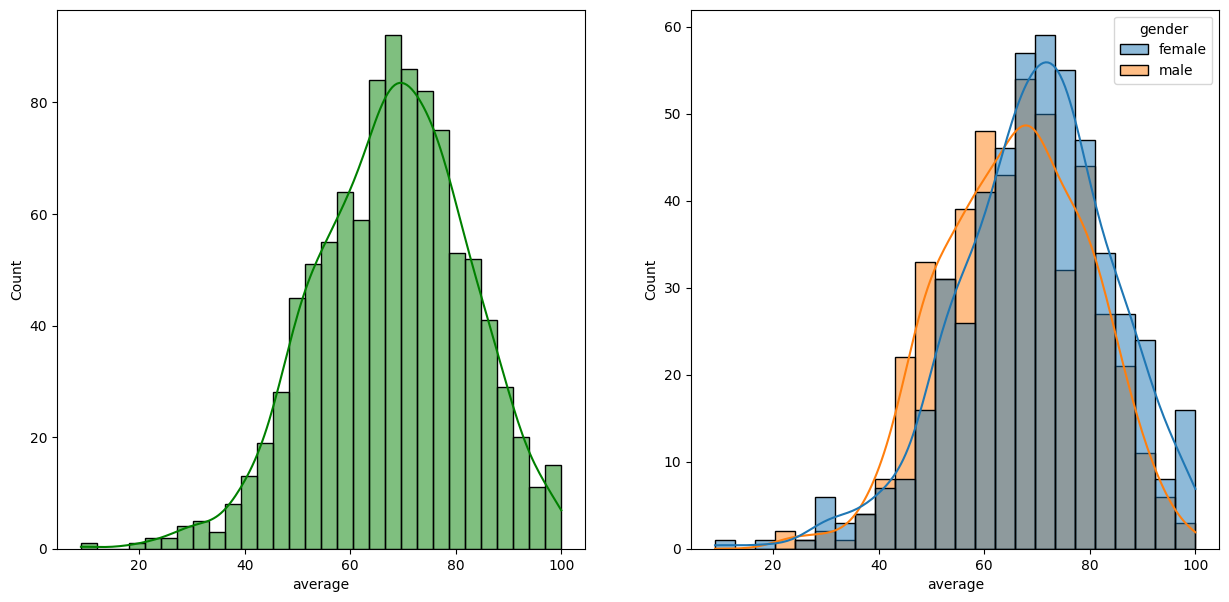

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

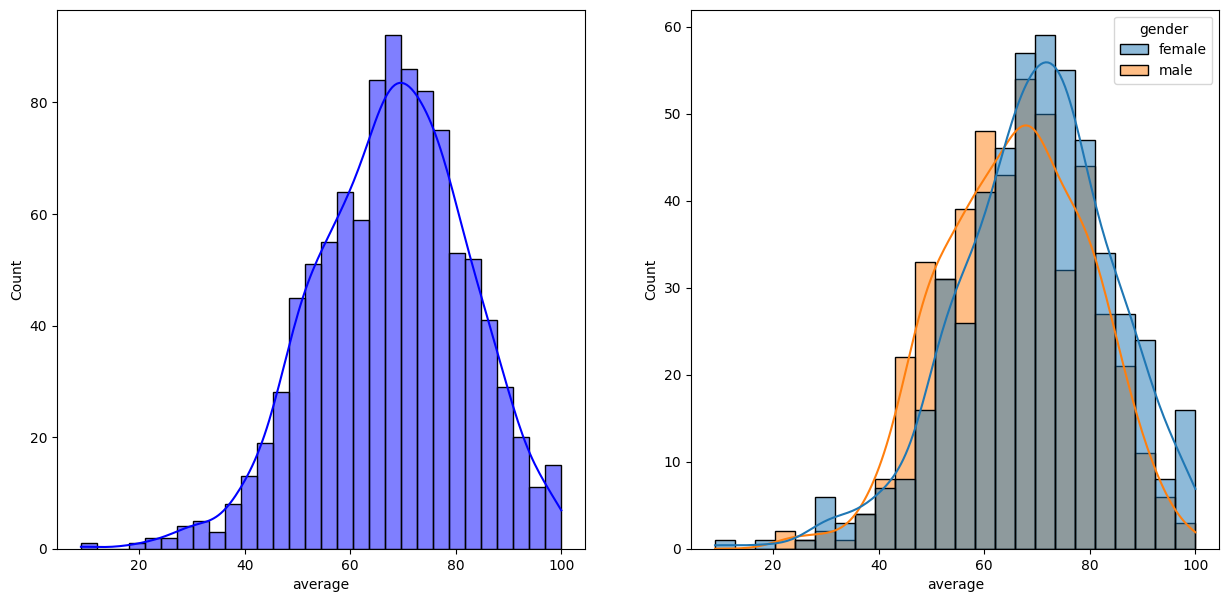

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color='b'  )
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')


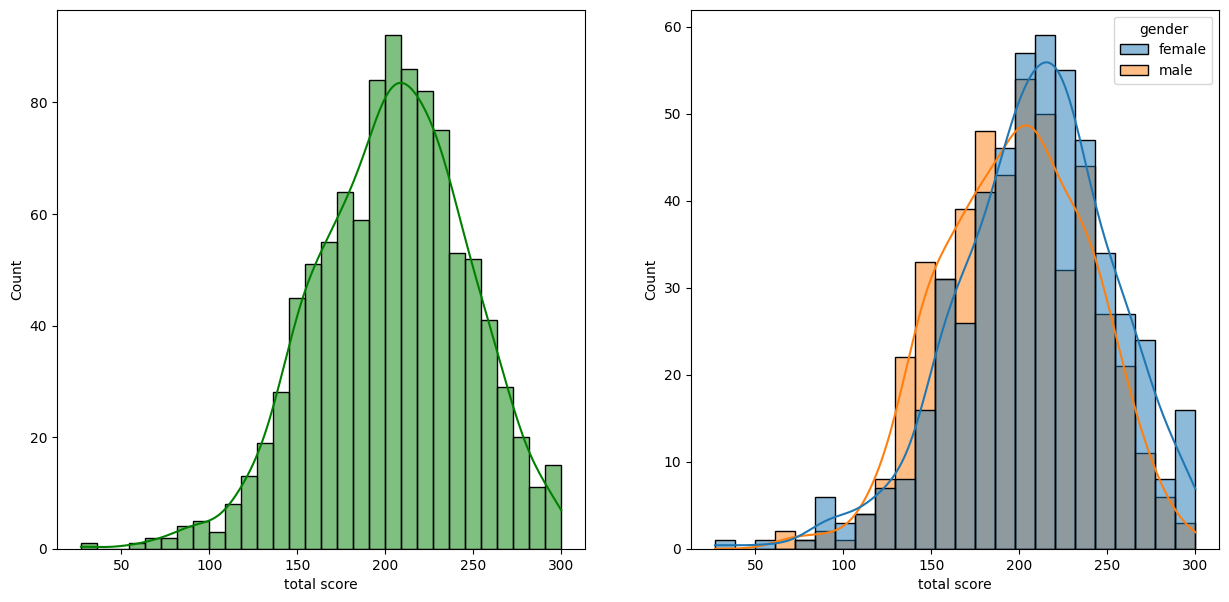

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', bins = 30, kde = True, color = 'g' )
plt.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
plt.show()

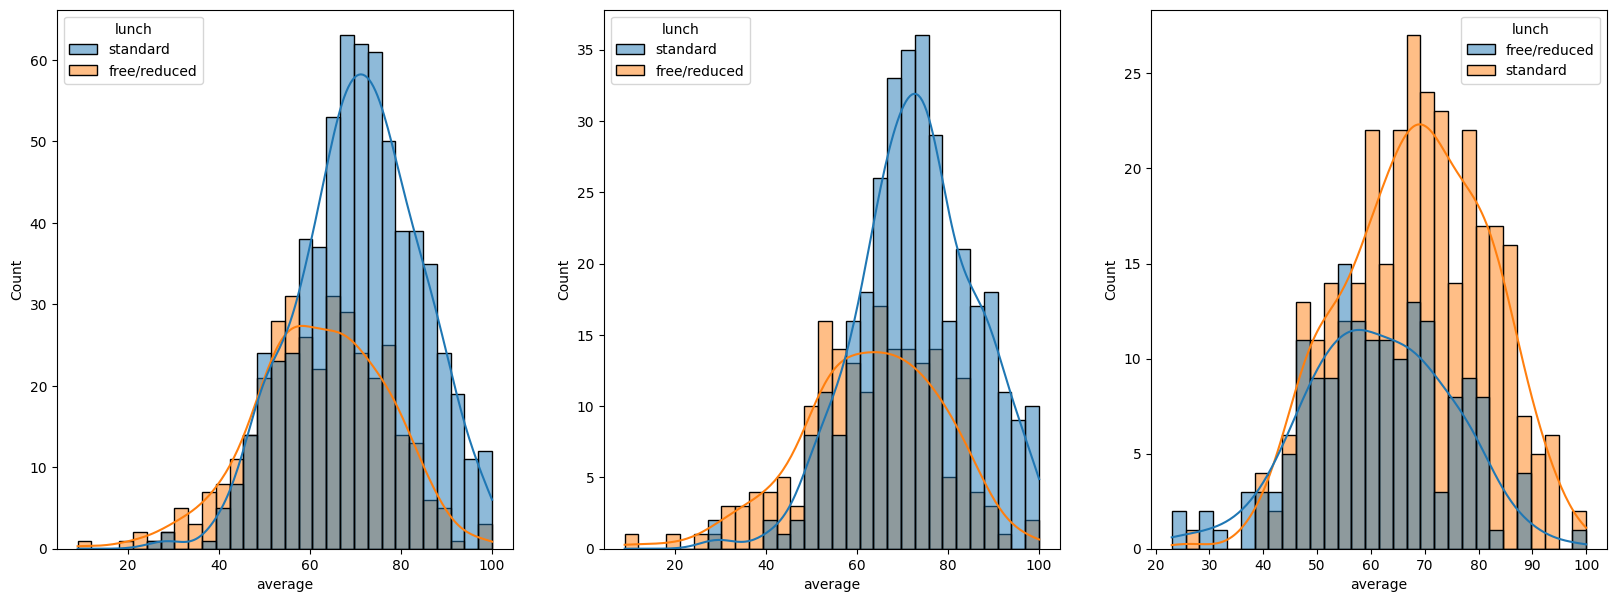

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (20,7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], bins = 30, x = 'average', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender=='male'], bins = 30, x ='average', kde = True, hue = 'lunch')
plt.show()

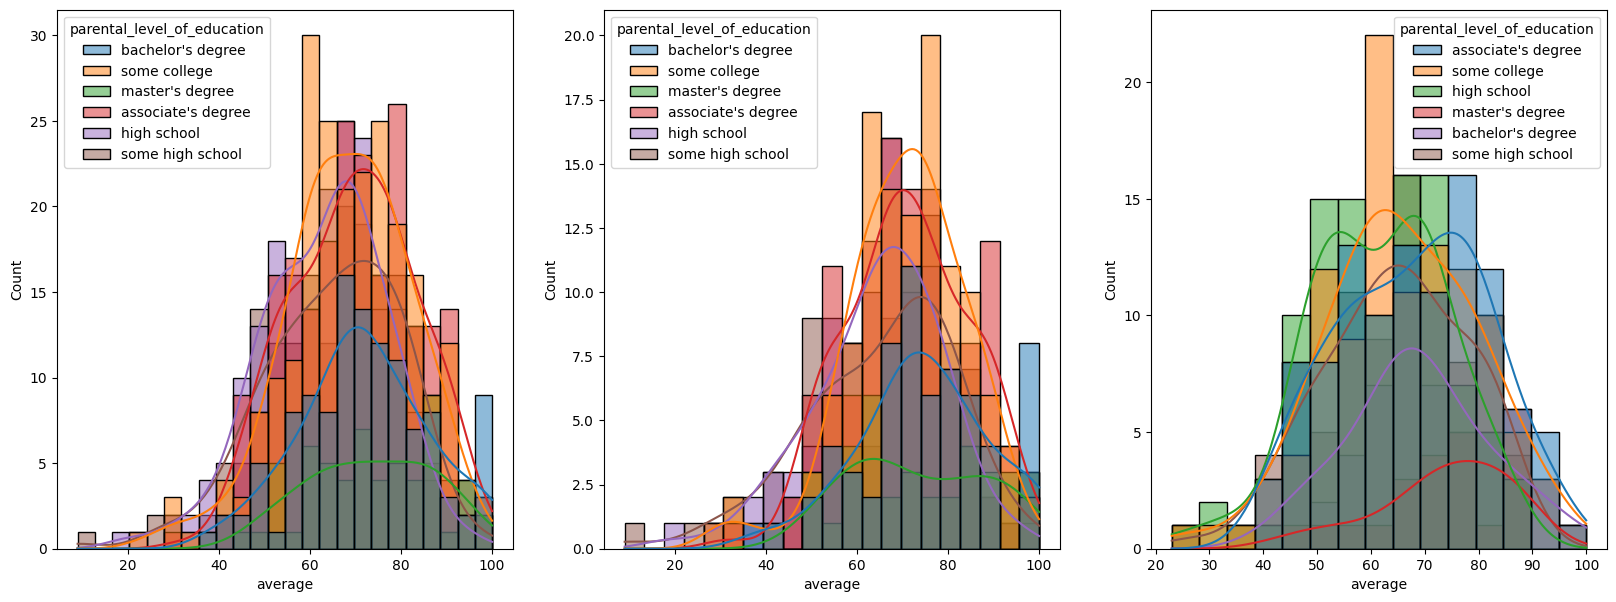

In [23]:
fig, axs = plt.subplots(1, 3, figsize = (20,7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender=='male'], x ='average', kde = True, hue = 'parental_level_of_education')
plt.show()

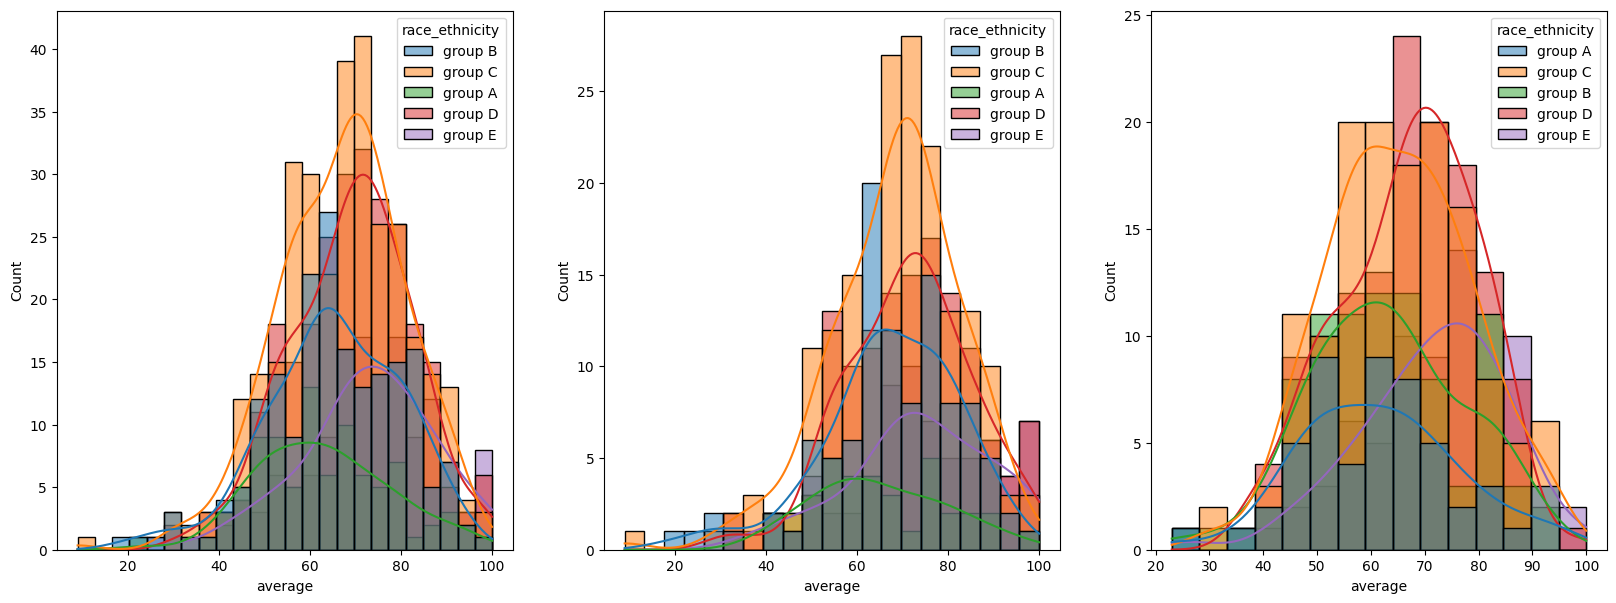

In [24]:
fig, axs = plt.subplots(1, 3, figsize = (20,7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender=='male'], x ='average', kde = True, hue = 'race_ethnicity')
plt.show()

# Box plot for checking mark distribution

<Axes: title={'center': 'Writing score'}, ylabel='writing_score'>

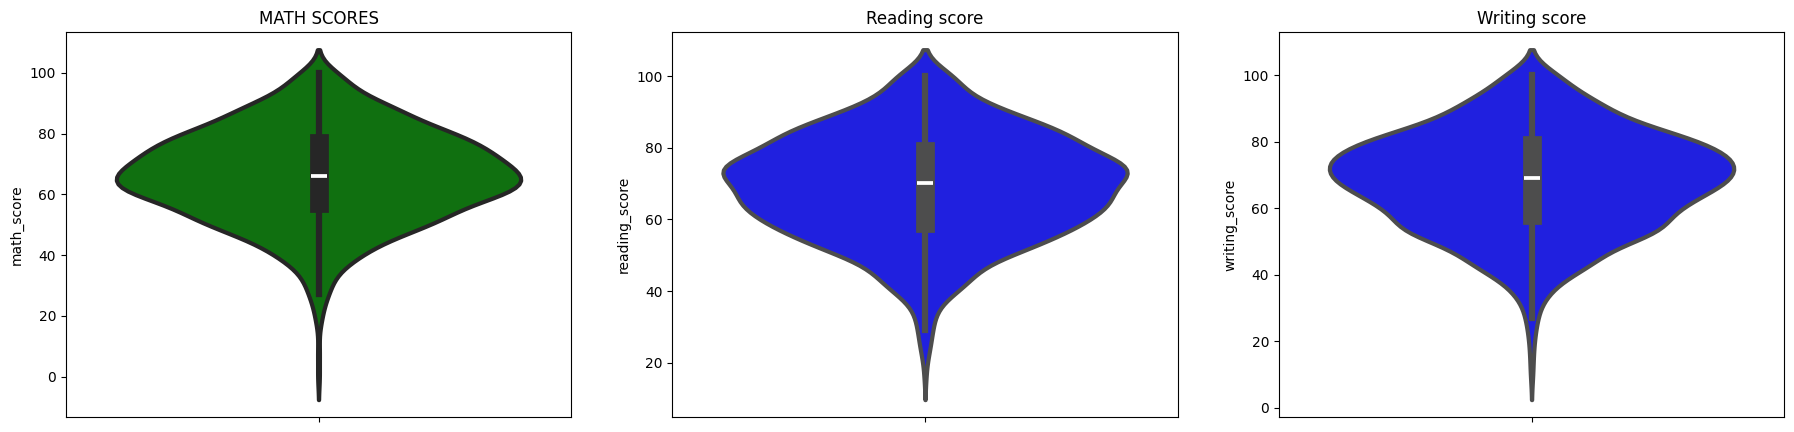

In [25]:
plt. figure(figsize = (30,5))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(data = df, y = 'math_score', color = 'green', linewidth = 3 )

plt.subplot(142)
plt.title('Reading score')
sns.violinplot(data = df, y= 'reading_score', color = 'blue', linewidth = 3 )

plt.subplot(143)
plt.title('Writing score')
sns.violinplot(data = df, y= 'writing_score', color = 'blue', linewidth = 3 )


# Multivariate analysis using pieplot

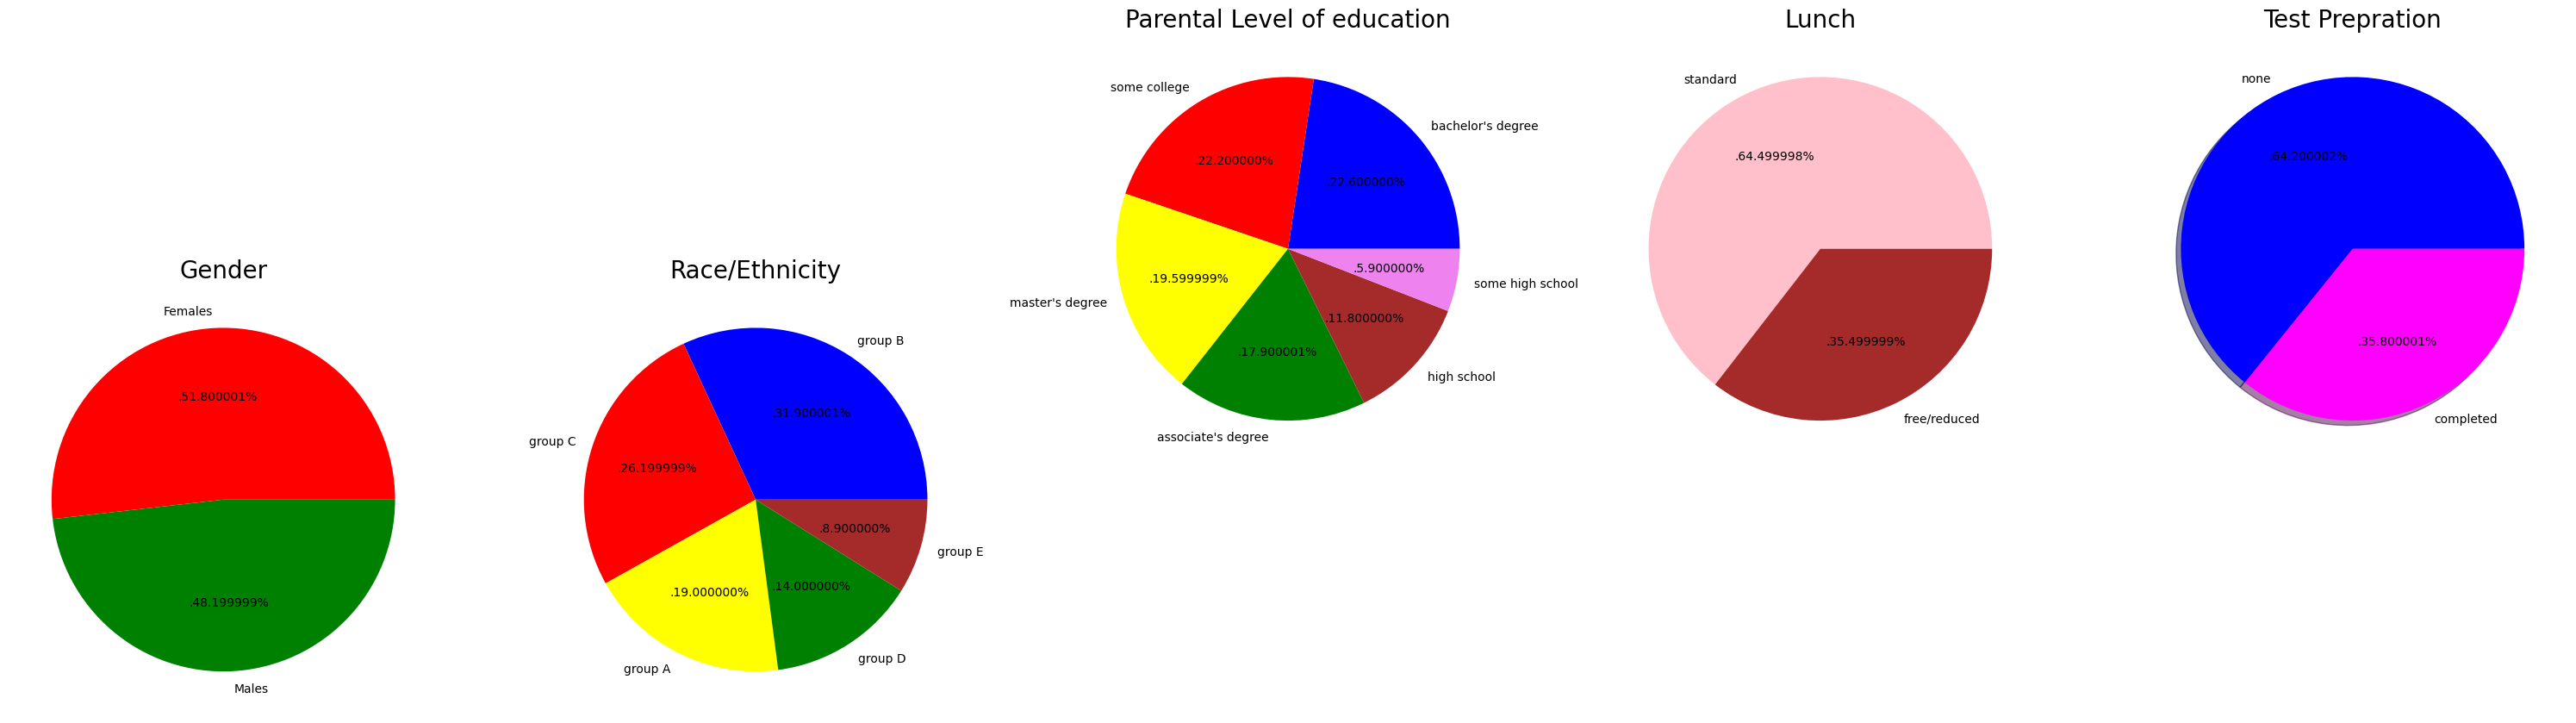

In [48]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Females', 'Males'
color = ['red', 'green']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['blue', 'red', 'yellow', 'green', 'brown']

plt.pie(size, colors=color, labels=labels,autopct= '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(2,5,3)
size = df['parental_level_of_education'].value_counts()
labels ="bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'
color = ['blue', 'red', 'yellow', 'green', 'brown', 'violet', ]

plt.pie(size, colors=color, labels=labels,autopct= '.%2f%%')
plt.title('Parental Level of education', fontsize = 20)
plt.axis('off')


plt.subplot(2,5,4)
size = df['lunch'].value_counts()
labels ='standard', 'free/reduced'
color = ['pink', 'brown']

plt.pie(size, colors=color, labels=labels,autopct= '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(2,5,5)
size = df['test_preparation_course'].value_counts()
labels ='none','completed'
color = ['blue', 'magenta' ]

plt.pie(size, colors=color, shadow= True, labels=labels,autopct= '.%2f%%')
plt.title('Test Prepration', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

# Univariate analysis of Gender

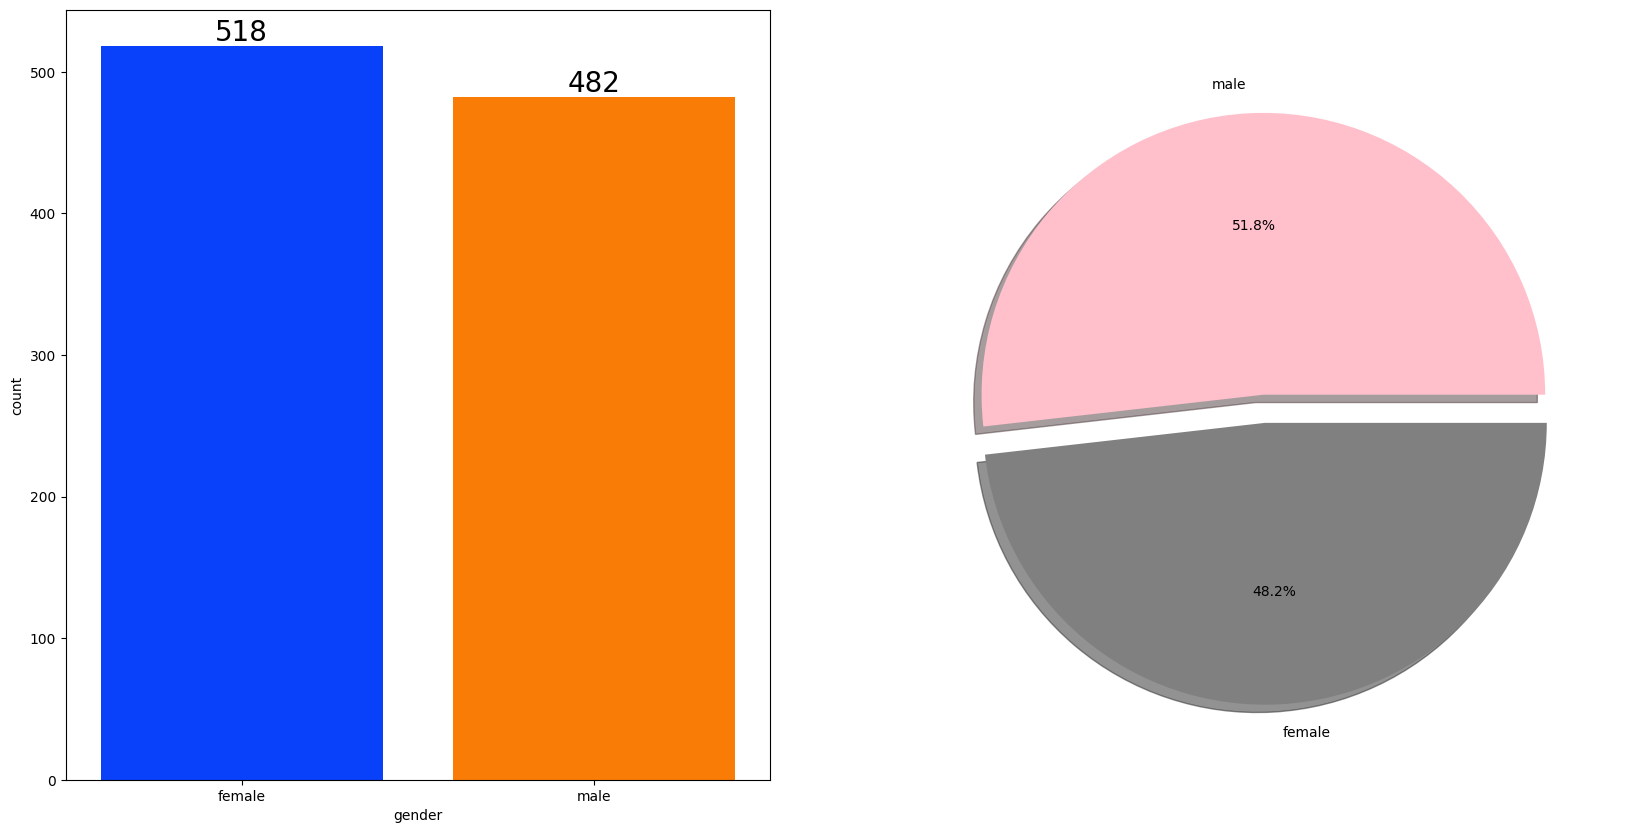

In [63]:

f, ax = plt.subplots(1, 2, figsize= (20,10))
sns.countplot(data = df, x = df['gender'], palette= 'bright', ax = ax[0], saturation = 0.95) 
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x=df['gender'].value_counts(), labels = ['male', 'female'], explode=[0,0.1], autopct= '%1.1f%%', shadow = True, colors=['pink','grey']  )
plt.show()


# Univariate analysis of race/ethnicity

Text(0.5, 1.0, 'Race/Ethnicity')

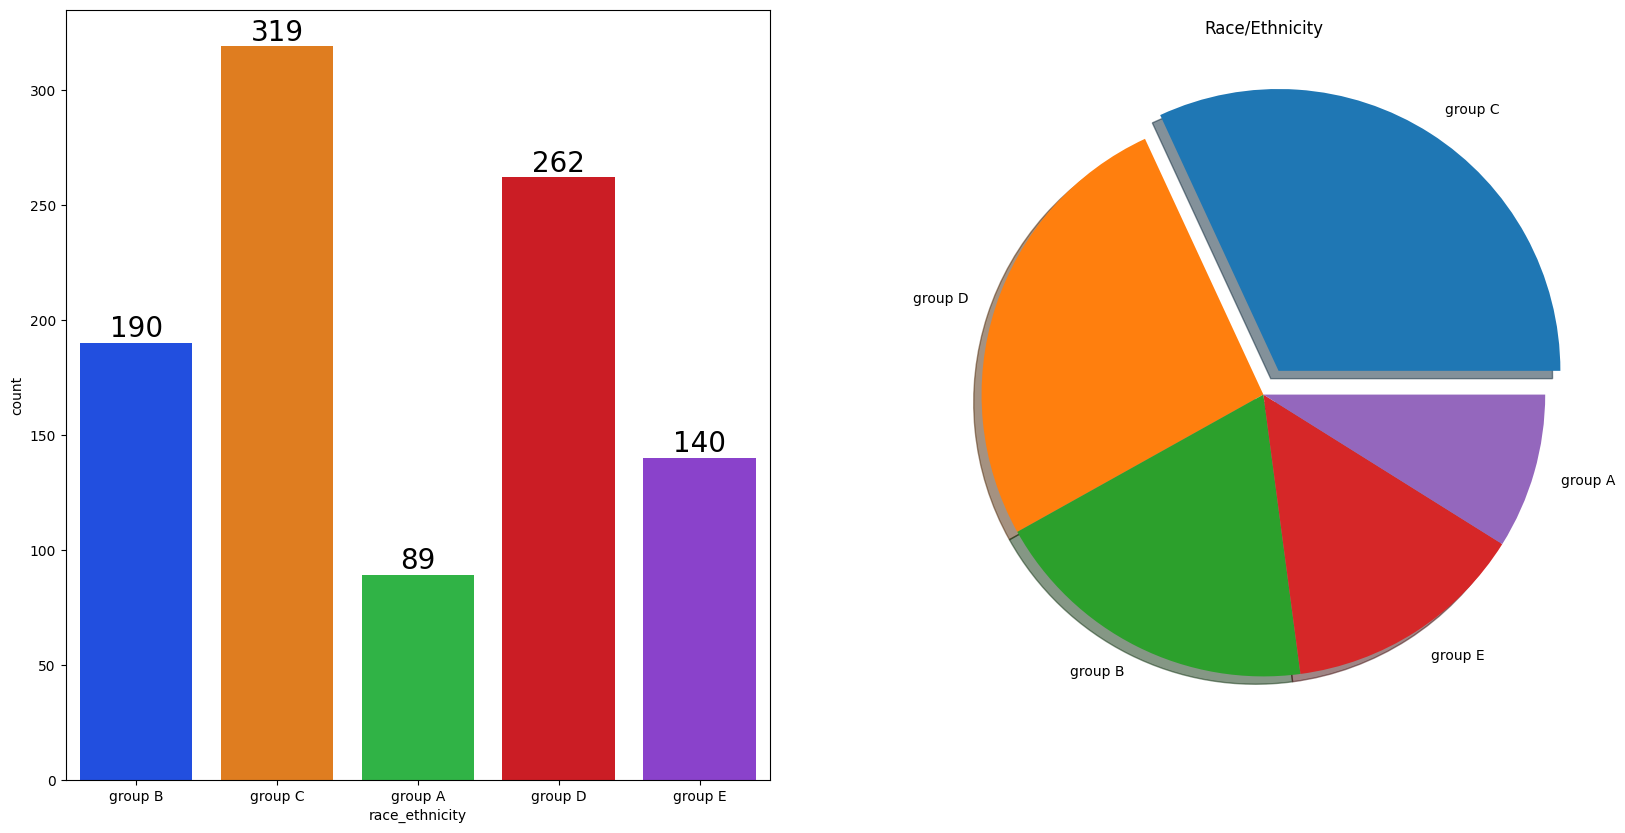

In [128]:
f,ax = plt.subplots(1,2,figsize=(20,10))
# color = ['blue', 'red', 'yellow', 'green', 'brown']
sns.countplot(x = df['race_ethnicity'], data = df, ax=ax[0], palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

labels = ['group C', 'group D', 'group B', 'group E', 'group A']
ax[1].pie(x =df['race_ethnicity'].value_counts(), labels = labels, explode=[0.1,0,0,0,0], shadow=True )
ax[1].set_title("Race/Ethnicity")

# Bivariate analysis of Race/Ethnicity

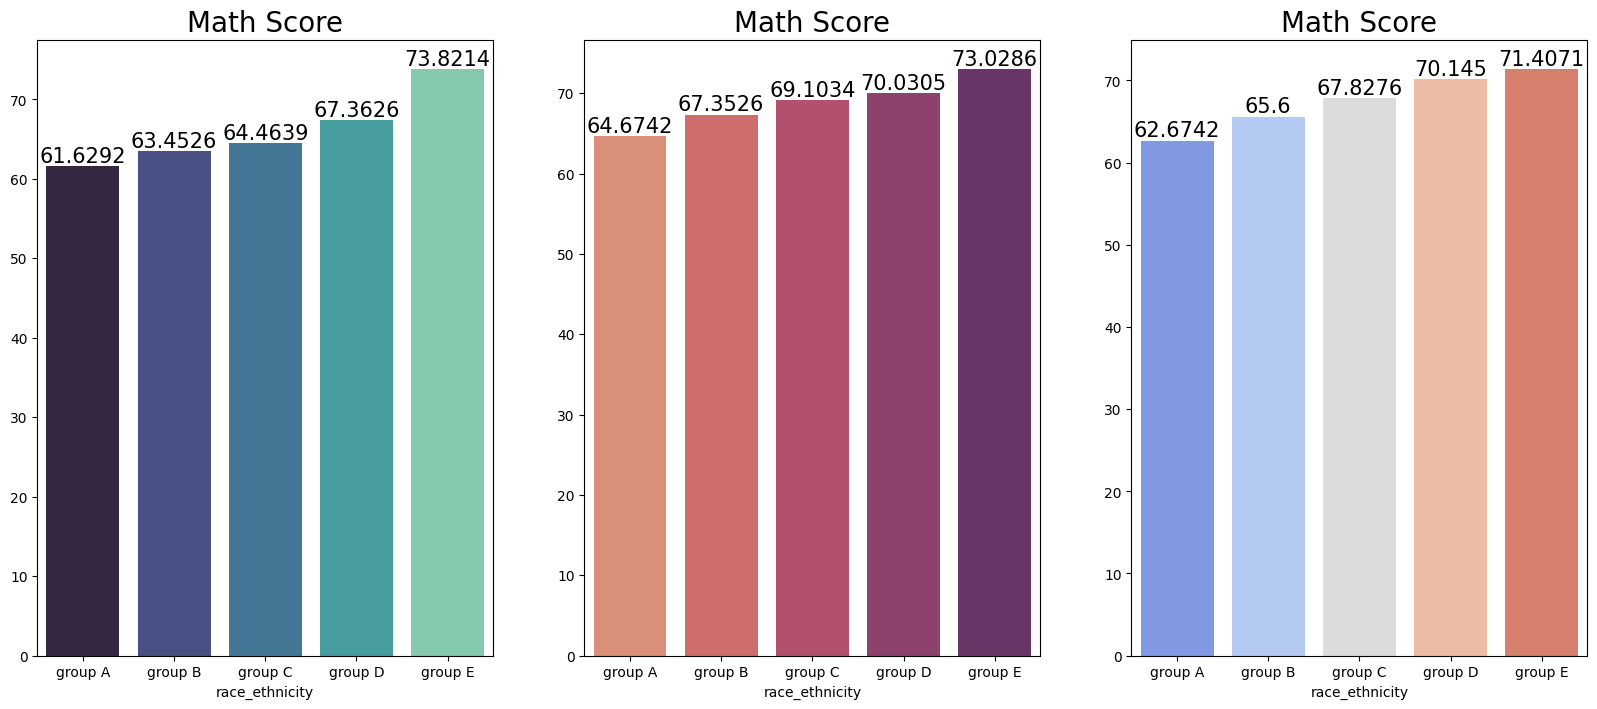

In [138]:
group_data2=df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index, y = group_data2['math_score'].mean().values, palette='mako', ax = ax[0])
ax[0].set_title('Math Score', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 15)

sns.barplot(x=group_data2['reading_score'].mean().index, y = group_data2['reading_score'].mean().values, palette='flare', ax = ax[1])
ax[1].set_title('Math Score', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size = 15)


sns.barplot(x=group_data2['writing_score'].mean().index, y = group_data2['writing_score'].mean().values, palette='coolwarm', ax = ax[2])
ax[2].set_title('Math Score', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size = 15)



# Univariate analysis on parents education

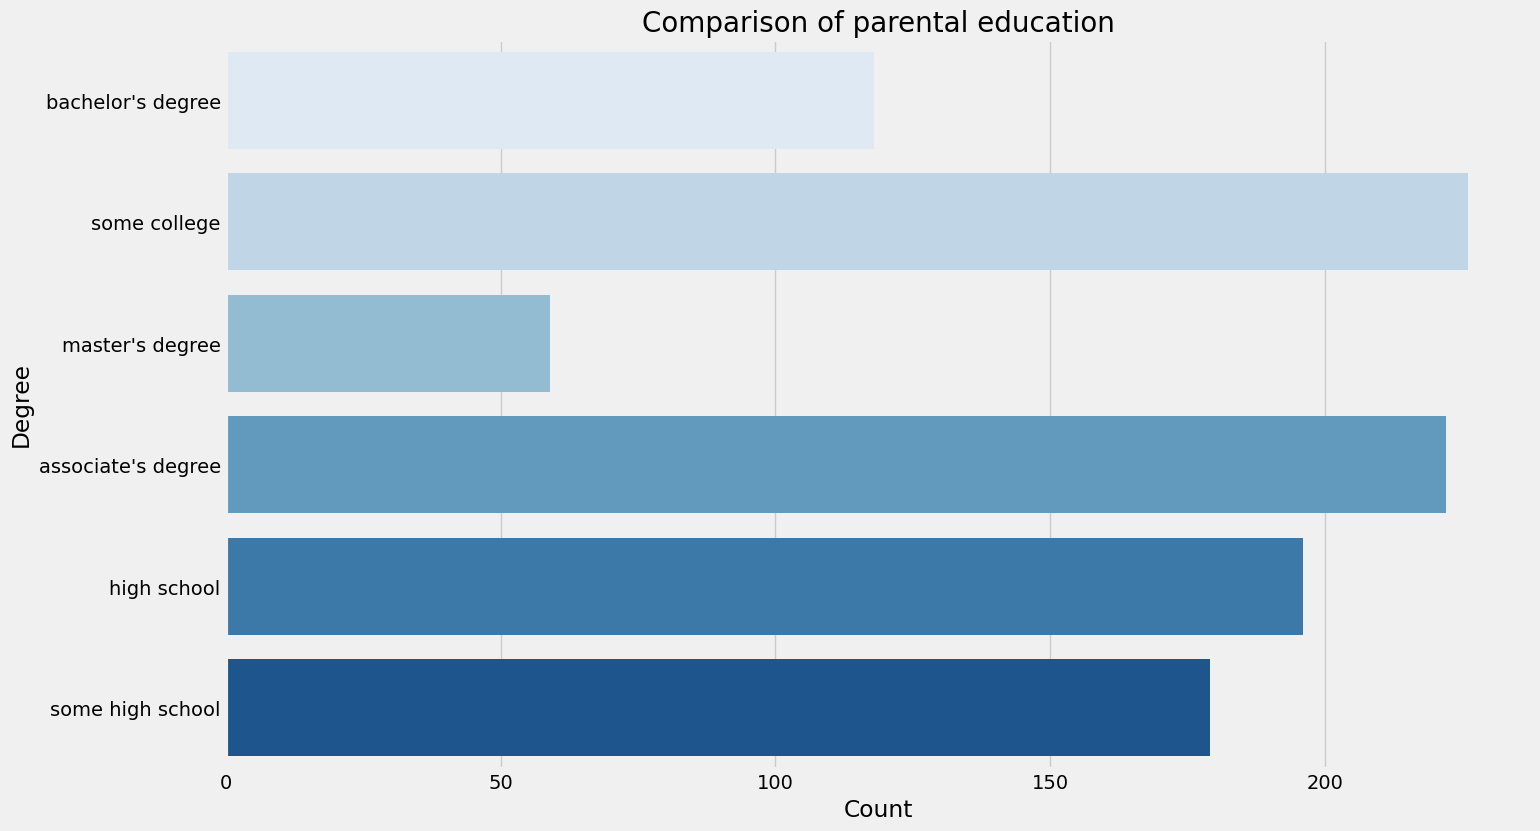

In [148]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of parental education', fontweight = 30, fontsize= 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

# Univariate analysis on lunch

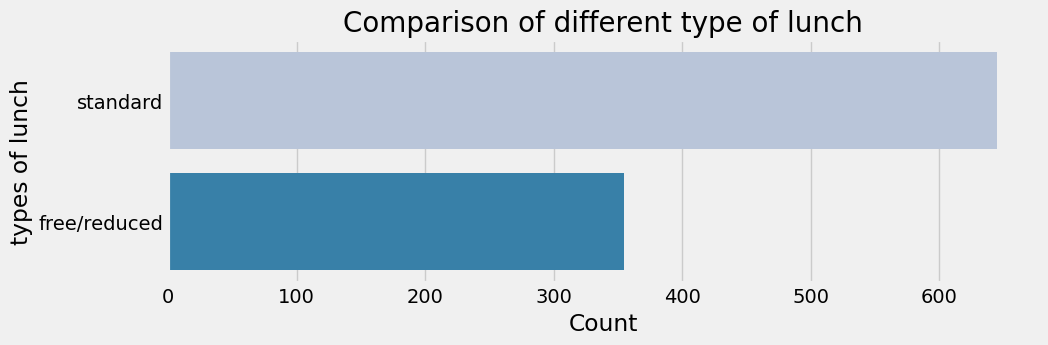

In [150]:
plt.rcParams['figure.figsize'] = (10,3)

sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different type of lunch', fontweight = 30, fontsize= 20)
plt.xlabel('Count')
plt.ylabel('types of lunch')
plt.show()

# Bivariate analysis on lunch intake has impact on students performance

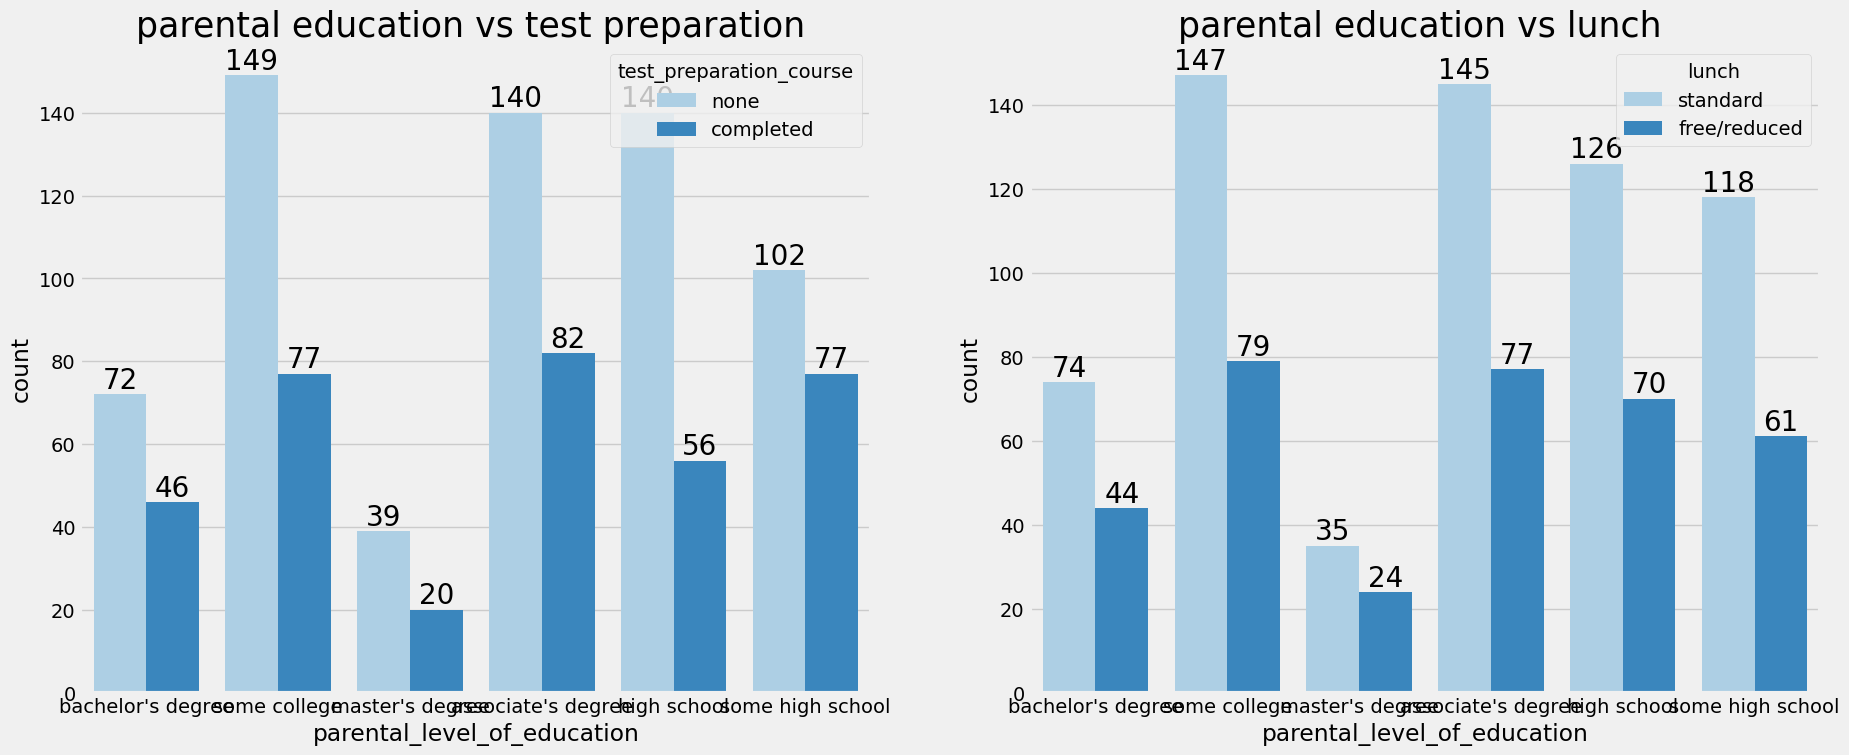

In [167]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'Blues',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('parental education vs test preparation ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'Blues',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('parental education vs lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

# Bivariate analysis on test preprations impact on students performance

<Axes: xlabel='lunch', ylabel='writing_score'>

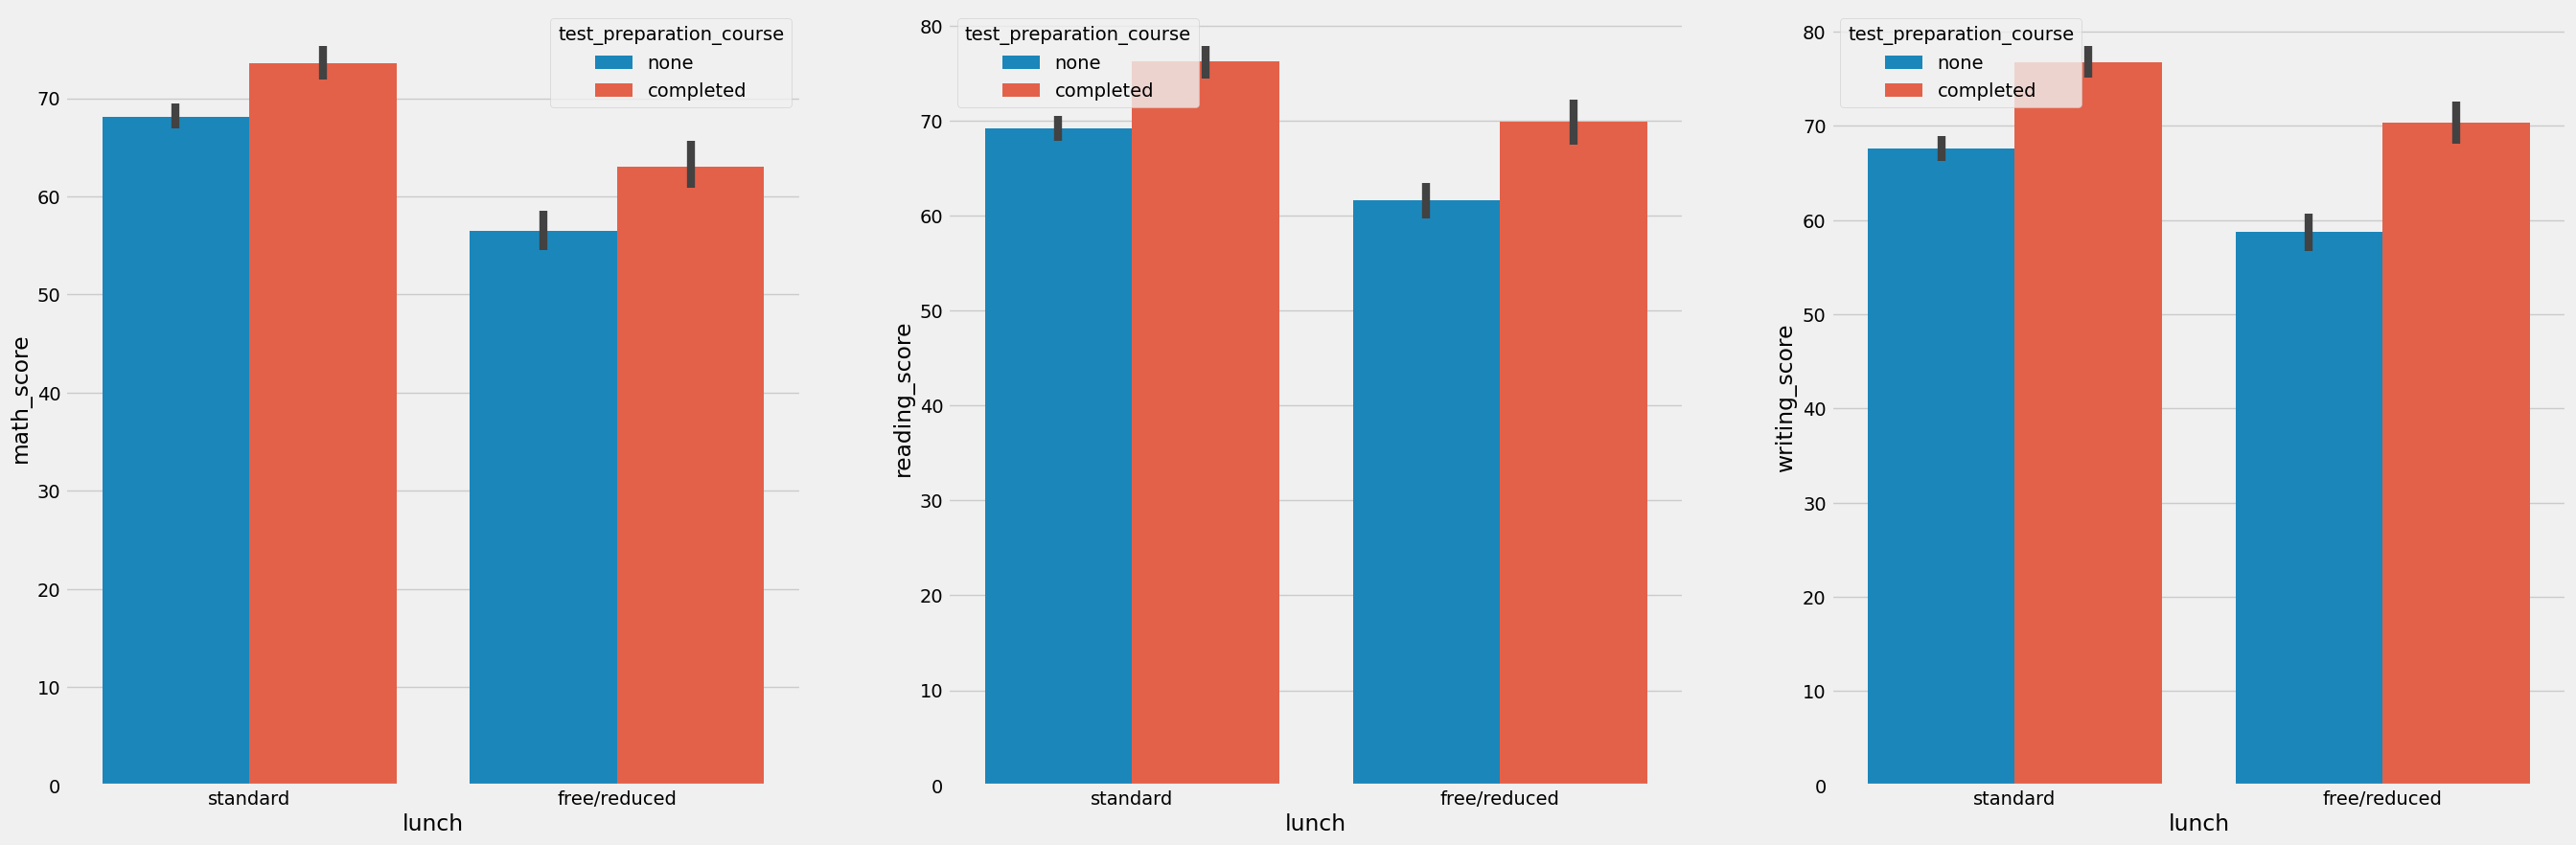

In [189]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# Checking Outliers

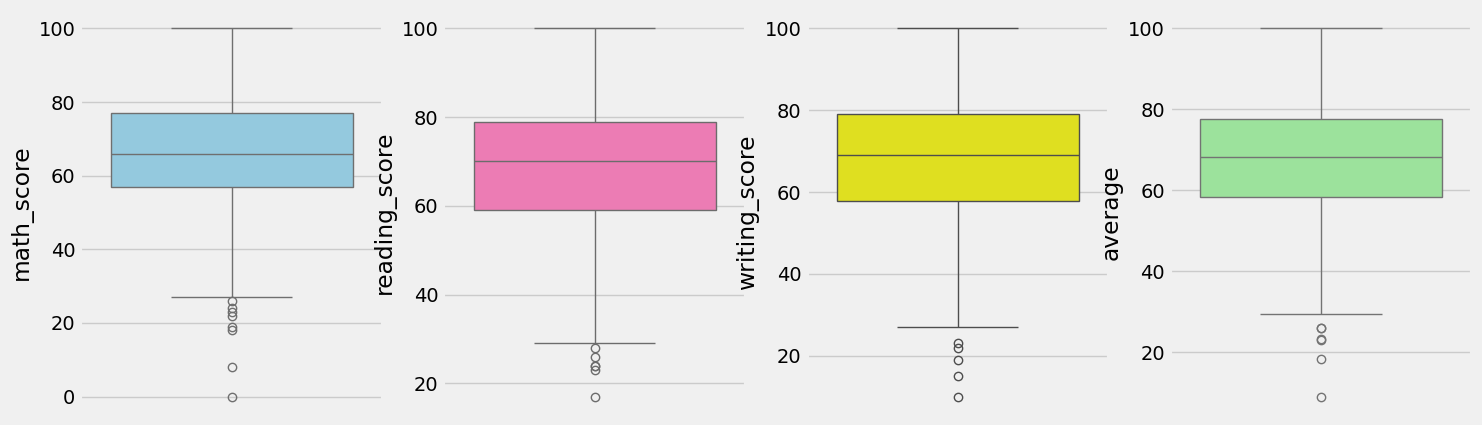

In [187]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['average'], color = 'lightgreen')
plt.show()

# Multivariate analysis using pairplot

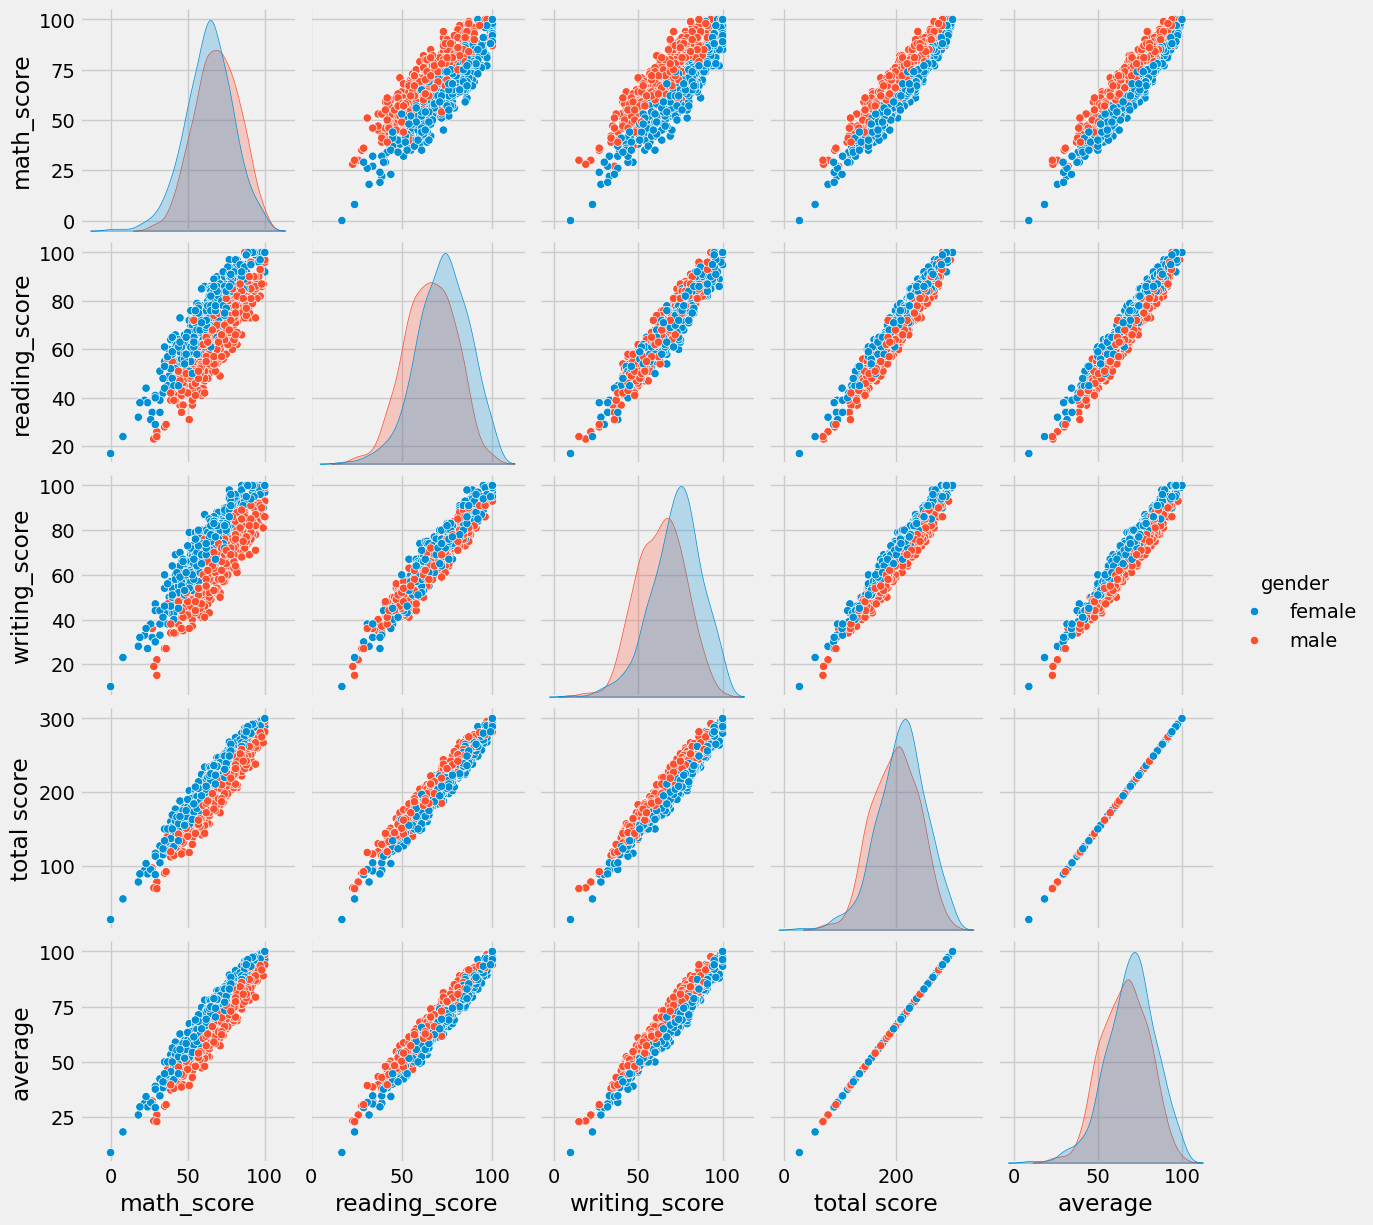

In [188]:
sns.pairplot(df, hue = 'gender')
plt.show()